# Analyzing Open University Learning Analytics Dataset

#### Reference: https://archive.ics.uci.edu/ml/datasets/Open+University+Learning+Analytics+dataset#

#### Complete data and data description: https://analyse.kmi.open.ac.uk/open_dataset

Open University Learning Analytics Dataset (OULAD) contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules)----AAA, BBB, CCC, DDD, EEE, FFF, GGG. Presentations of courses start in February and October - they are marked by 'B' and 'J' respectively (2013B, 2013J, 2014B, 2014J). The dataset consists of tables connected using unique identifiers. Dataset is stored in several csv files
<ol>
    <li>assessements.csv (206)</li>
    <li>courses.csv (22)</li>
    <li>studentAssessment.csv (173912)</li>
    <li>studentInfo.csv (32593)</li>
    <li>studentRegistration.csv (32593)</li>
    <li>studentVle.csv (10655280)</li>
    <li>vle.csv (6364)</li>
</ol>

In [1]:
!ls

Analyzing_Open_University_Learning_Analytics_Dataset.ipynb
Dataset
README.md


In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns
%matplotlib inline

In [3]:
student_info = pd.read_csv('Dataset/studentInfo.csv')
student_assessment = pd.read_csv('Dataset/studentAssessment.csv')
student_registration = pd.read_csv('Dataset/studentRegistration.csv')
student_vle = pd.read_csv('Dataset/studentVle.csv')
assessments = pd.read_csv('Dataset/assessments.csv')
courses = pd.read_csv('Dataset/courses.csv')
vle = pd.read_csv('Dataset/vle.csv')

In [4]:
print('Courses     : ',courses.shape[0])
print('Assessments : ',assessments.shape[0])
print('vle(Virtual Learning Environment) : ',vle.shape[0])
print('Student Info         : ',student_info.shape[0])
print('student Assessment   : ',student_assessment.shape[0])
print('student Registration : ',student_registration.shape[0])
print('student Vle          : ',student_vle.shape[0])

Courses     :  22
Assessments :  206
vle(Virtual Learning Environment) :  6364
Student Info         :  32593
student Assessment   :  173912
student Registration :  32593
student Vle          :  10655280


In [161]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [6]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


In [7]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


In [8]:
student_vle.head()


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [9]:
assessments.head()


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


In [10]:
courses.head()


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [11]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?
3,546888,AAA,2013J,url,?,?
4,547035,AAA,2013J,resource,?,?


In [12]:
student_info.shape

(32593, 12)

In [13]:
student_assessment.shape

(173912, 5)

In [14]:
student_registration.shape

(32593, 5)

In [15]:
student_vle.shape

(10655280, 6)

In [16]:
assessments.shape

(206, 6)

In [17]:
courses.shape

(22, 3)

In [18]:
vle.shape

(6364, 6)

## EDA 

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64


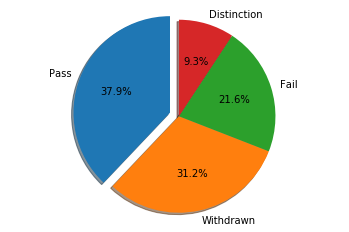

In [19]:
print(student_info['final_result'].value_counts())
labels = student_info['final_result'].unique()
sizes = student_info['final_result'].value_counts()
explode = (0.1, 0, 0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

Minimum_Credits :  30
Maximum_Credits:  655
Zero credits :  0


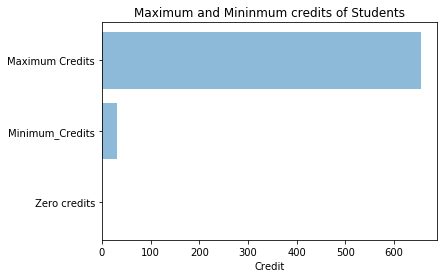

In [20]:
print('Minimum_Credits : ',str(student_info['studied_credits'].min()))
print('Maximum_Credits: ',str(student_info['studied_credits'].max()))
print('Zero credits : ',student_info[student_info['studied_credits'] == 0].size)

objects = ('Zero credits', 'Minimum_Credits', 'Maximum Credits' )
y_pos = np.arange(len(objects))
performance = {(student_info['studied_credits'].min()), (student_info['studied_credits'].max()), (student_info[student_info['studied_credits'] == 0].size)}
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Credit')
plt.title('Maximum and Mininmum credits of Students')
plt.show()

Minimum_Credits(PASS) 30
Maximum_Credits(PASS) 630


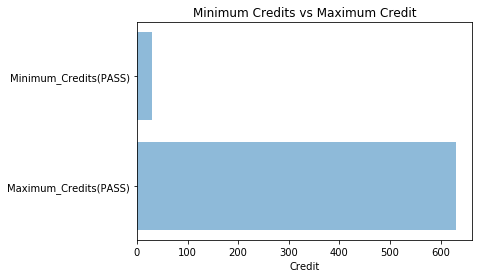

In [21]:
#get student past credits for passing students
passing_student_info = student_info[student_info['final_result']=='Pass']
print('Minimum_Credits(PASS)',passing_student_info['studied_credits'].min())
print('Maximum_Credits(PASS)',passing_student_info['studied_credits'].max())

objects = ('Maximum_Credits(PASS)', 'Minimum_Credits(PASS)')
y_pos = np.arange(len(objects))
performance = {(passing_student_info['studied_credits'].min()), (passing_student_info['studied_credits'].max())}
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Credit')
plt.title('Minimum Credits vs Maximum Credit')
plt.show()



Minimum_Credits(Withdrawn) 30
Maximum_Credits(Withdrawn) 655


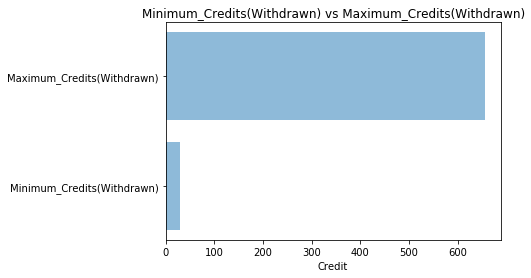

In [22]:
#get student past credits for withdrawing students
withdrawn_student_info = student_info[student_info['final_result']=='Withdrawn']
#print(withdrawn_student_info['studied_credits'].value_counts())
print('Minimum_Credits(Withdrawn)',withdrawn_student_info['studied_credits'].min())
print('Maximum_Credits(Withdrawn)',withdrawn_student_info['studied_credits'].max())

objects = ('Minimum_Credits(Withdrawn)', 'Maximum_Credits(Withdrawn)')
y_pos = np.arange(len(objects))
performance = {(withdrawn_student_info['studied_credits'].min()), (withdrawn_student_info['studied_credits'].max())}
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Credit')
plt.title('Minimum_Credits(Withdrawn) vs Maximum_Credits(Withdrawn)')
plt.show()




Minimum_Credits(Fail) 30
Maximum_Credits(Fail) 360


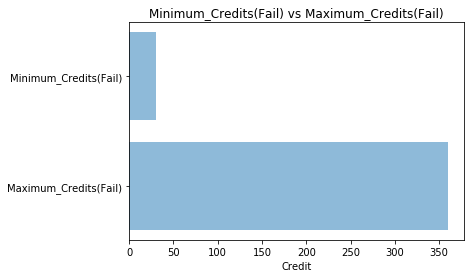

In [23]:
#get student past credits for Failing students
fail_student_info = student_info[student_info['final_result']=='Fail']
#print(fail_student_info['studied_credits'].value_counts())
print('Minimum_Credits(Fail)',fail_student_info['studied_credits'].min())
print('Maximum_Credits(Fail)',fail_student_info['studied_credits'].max())

objects = ('Maximum_Credits(Fail)', 'Minimum_Credits(Fail)')
y_pos = np.arange(len(objects))
performance = {(fail_student_info['studied_credits'].min()), (fail_student_info['studied_credits'].max())}
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Credit')
plt.title('Minimum_Credits(Fail) vs Maximum_Credits(Fail)')
plt.show()

### Visualizing Student Info

<p>Let's check the demographic overview of the students</p>

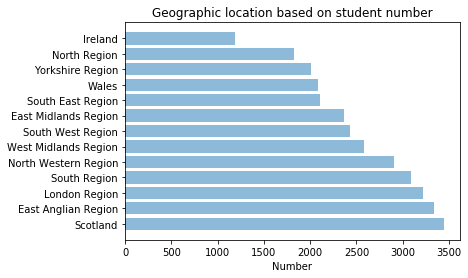

In [24]:
objects = ('Scotland', 
           'East Anglian Region', 
           'London Region', 
           'South Region',
           'North Western Region', 
           'West Midlands Region', 
           'South West Region', 
           'East Midlands Region', 
           'South East Region',
           'Wales', 
           'Yorkshire Region',
           'North Region',
           'Ireland' )
y_pos = np.arange(len(objects))
# Region wise total students
total_students_per_region = student_info['region'].value_counts(sort=True).to_list()
plt.barh(y_pos, total_students_per_region, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number')
plt.title('Geographic location based on student number')
plt.show()

Which region students takes more credits than others region?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

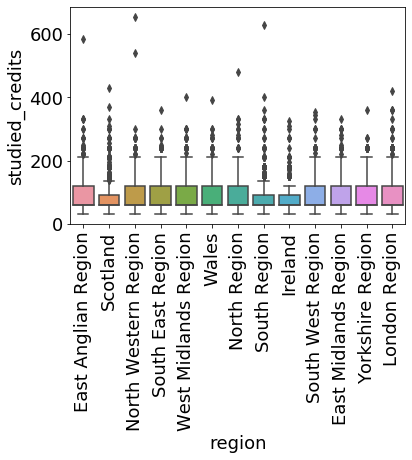

In [123]:
sns.boxplot(x = 'region', y = 'studied_credits', data=student_info)
plt.xticks(rotation = 90)

What is the academic performance scenario belongs to each regional students?

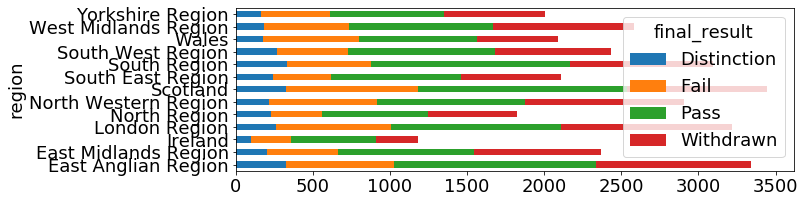

In [131]:
pd.crosstab(student_info.region, student_info.final_result).plot.barh(stacked = True, figsize=(10,3));

We found failures in some regions more than other regions. So we want to investigate more into those regional students.

In [26]:
student_info_fail = student_info[student_info["final_result"] =='Fail']

total_students_by_region = student_info.groupby(['region']).size().reset_index(name='Total Student').sort_values(by="Total Student",ascending=False)
failed_students_by_region = student_info_fail.groupby(['region']).size().reset_index(name='Total Failed').sort_values(by="Total Failed",ascending=False)
merged_total_and_failed_by_region = pd.merge(failed_students_by_region, total_students_by_region, on='region')
merged_total_and_failed_by_region['Percentage'] = round(merged_total_and_failed_by_region['Total Failed'] / merged_total_and_failed_by_region['Total Student'] * 100,3)

regions_with_higher_failure_ratio = merged_total_and_failed_by_region[merged_total_and_failed_by_region['Percentage'] >20]
regions_with_higher_failure_ratio


,region,Total Failed,Total Student,Percentage
0,Scotland,852,3446,24.724
1,London Region,744,3216,23.134
2,North Western Region,704,2906,24.226
3,East Anglian Region,698,3340,20.898
4,Wales,620,2086,29.722
5,West Midlands Region,551,2582,21.340
9,Yorkshire Region,449,2006,22.383
12,Ireland,261,1184,22.044


We see that the failure rate is more than 20% in 7 different regions among 13. Let's dig deeper into them next.
What is the gender scenerio among the students? Time to find out which gender is dominating 

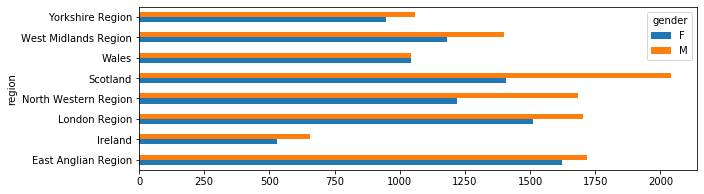

In [27]:
filtered_student_info = student_info[student_info.region.isin(regions_with_higher_failure_ratio['region'])]
pd.crosstab(filtered_student_info.region, filtered_student_info.gender).plot.barh(figsize=(10,3));

It appears the regions are male dominated.

But what about Higher Education scenario in this areas? Let's find out

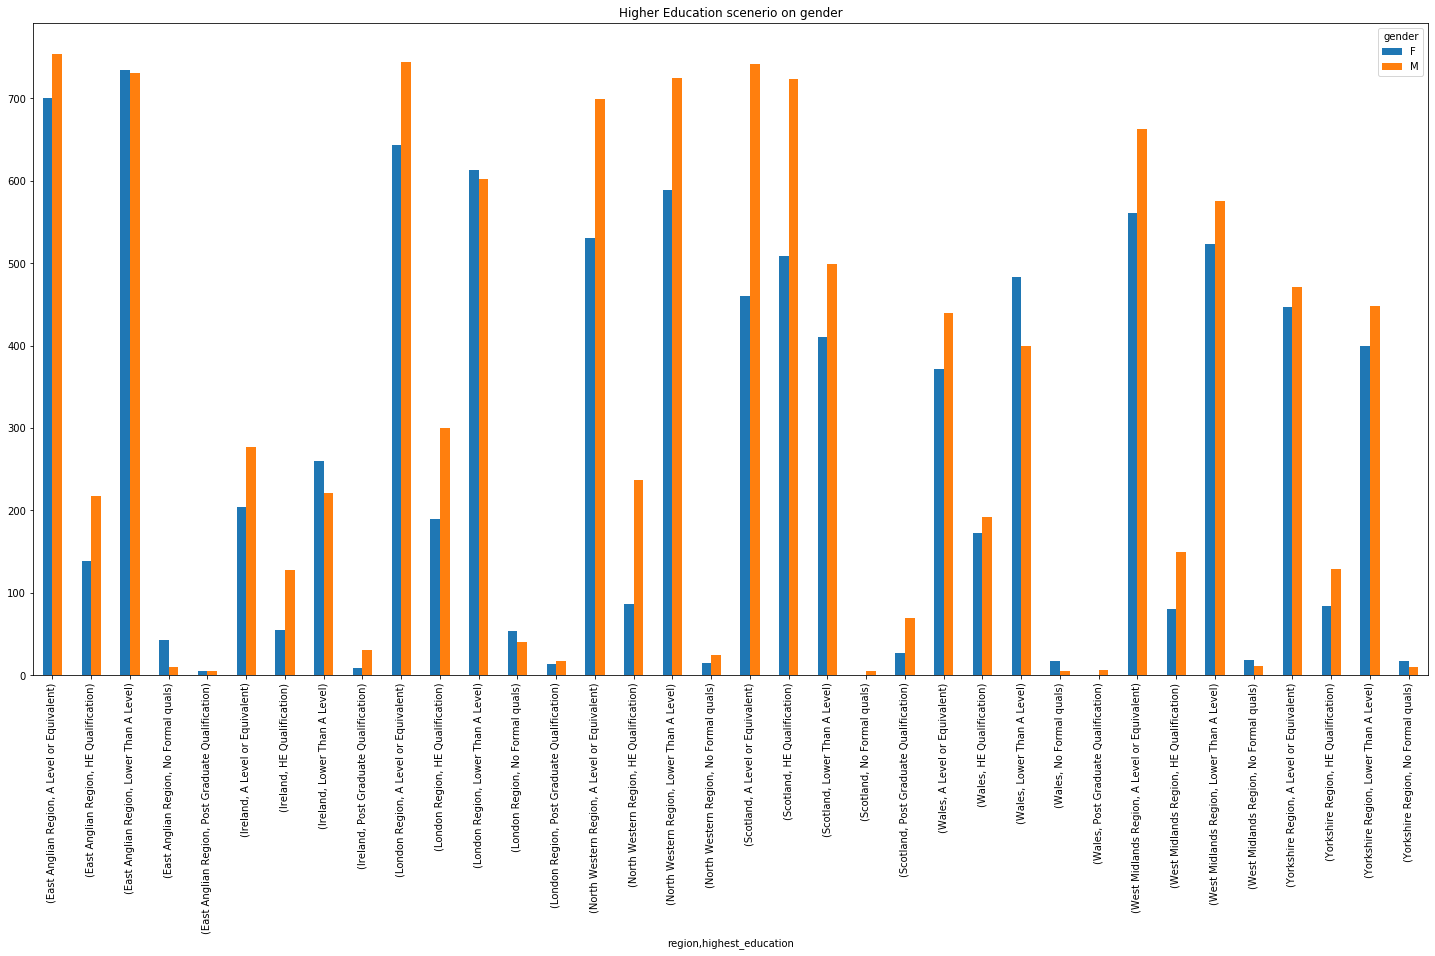

In [28]:
filtered_student_info.groupby(['region','highest_education','gender']).size().unstack().plot(kind='bar', title='Higher Education scenerio on gender',figsize=(25,12))
plt.show()

This shows that very few regions(4 out of 8) have the students with <b>Post Graduation Qualification</b>. Even though that number is very much low. Again the discrimination among male & female in all type of education level is significant.

Question is, which category of Higher Education most students have?

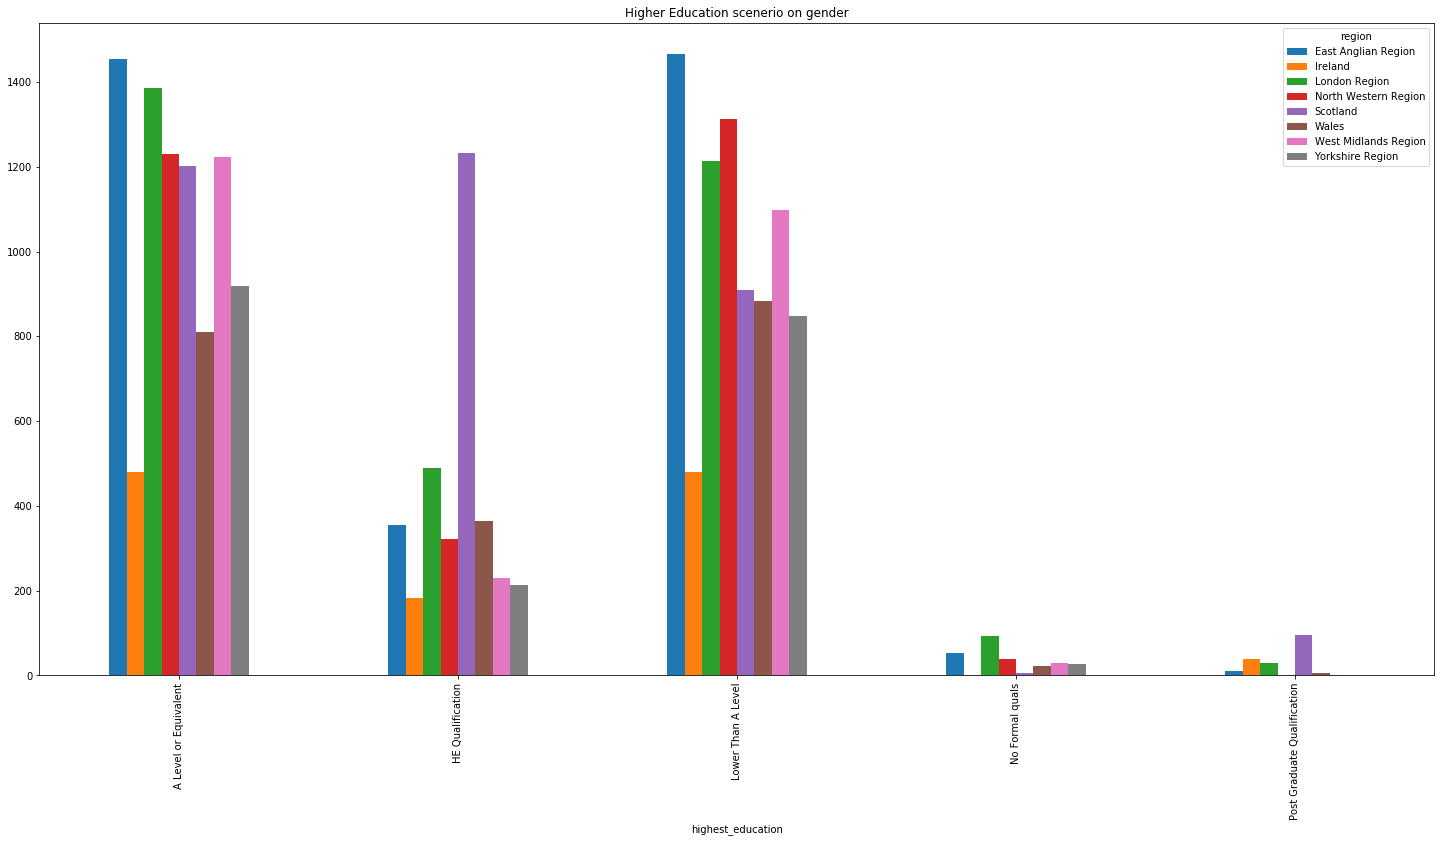

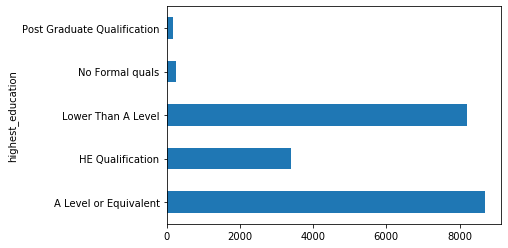

In [29]:
filtered_student_info.groupby(['highest_education','region']).size().unstack().plot(kind='bar', title='Higher Education scenerio on gender',figsize=(25,12))
plt.show()

filtered_student_info.groupby(['highest_education']).size().plot(kind='barh')

It turns out most of the students has A Level or Equivalent education level

Now we'll check the previous attempts and try to find out if it reflects the education level of the regions.

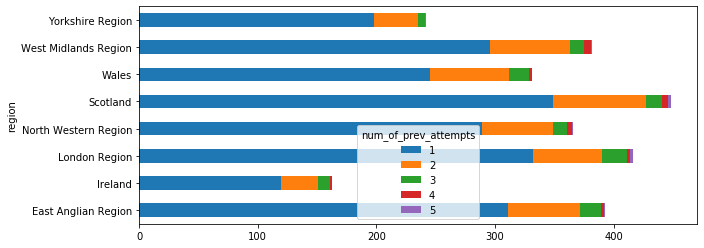

In [30]:
filtered_student_info_previous_attempt_not_0 = filtered_student_info[filtered_student_info['num_of_prev_attempts'] != 0]
pd.crosstab(filtered_student_info_previous_attempt_not_0.region, filtered_student_info_previous_attempt_not_0.num_of_prev_attempts).plot.barh(stacked = True, figsize=(10,4));

We found that Scotland tops, followed by East Anglian Region in the case of previous attempts.

Question - Students from which education band needed to take most previous attempts?

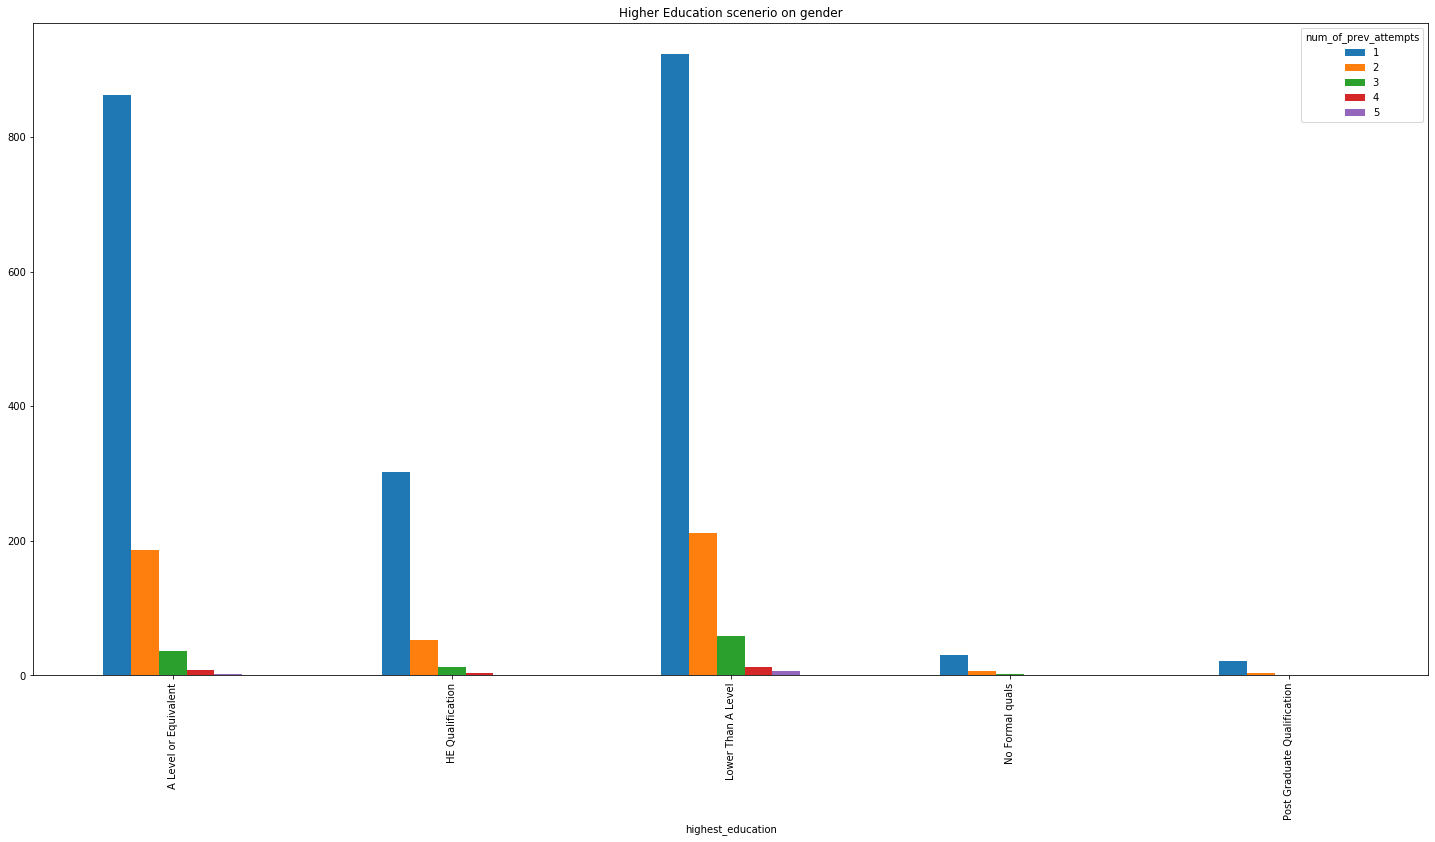

In [31]:
filtered_student_info_previous_attempt_not_0.groupby(['highest_education','num_of_prev_attempts']).size().unstack().plot(kind='bar', title='Higher Education scenerio on gender',figsize=(25,12))
plt.show()

It shows maximum students who has previous attempts, falls in the education level <b>Lower Than A Level<b/>

Question - Which age band they fall into?

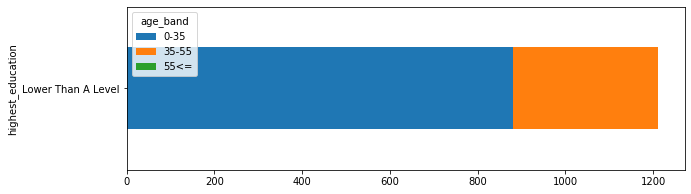

In [32]:
filtered_student_info_previous_attempt_not_0_lower_A_Level = filtered_student_info_previous_attempt_not_0[filtered_student_info_previous_attempt_not_0["highest_education"]== "Lower Than A Level"]
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.highest_education, student_info.age_band).plot.barh(stacked = True, figsize=(10,3));


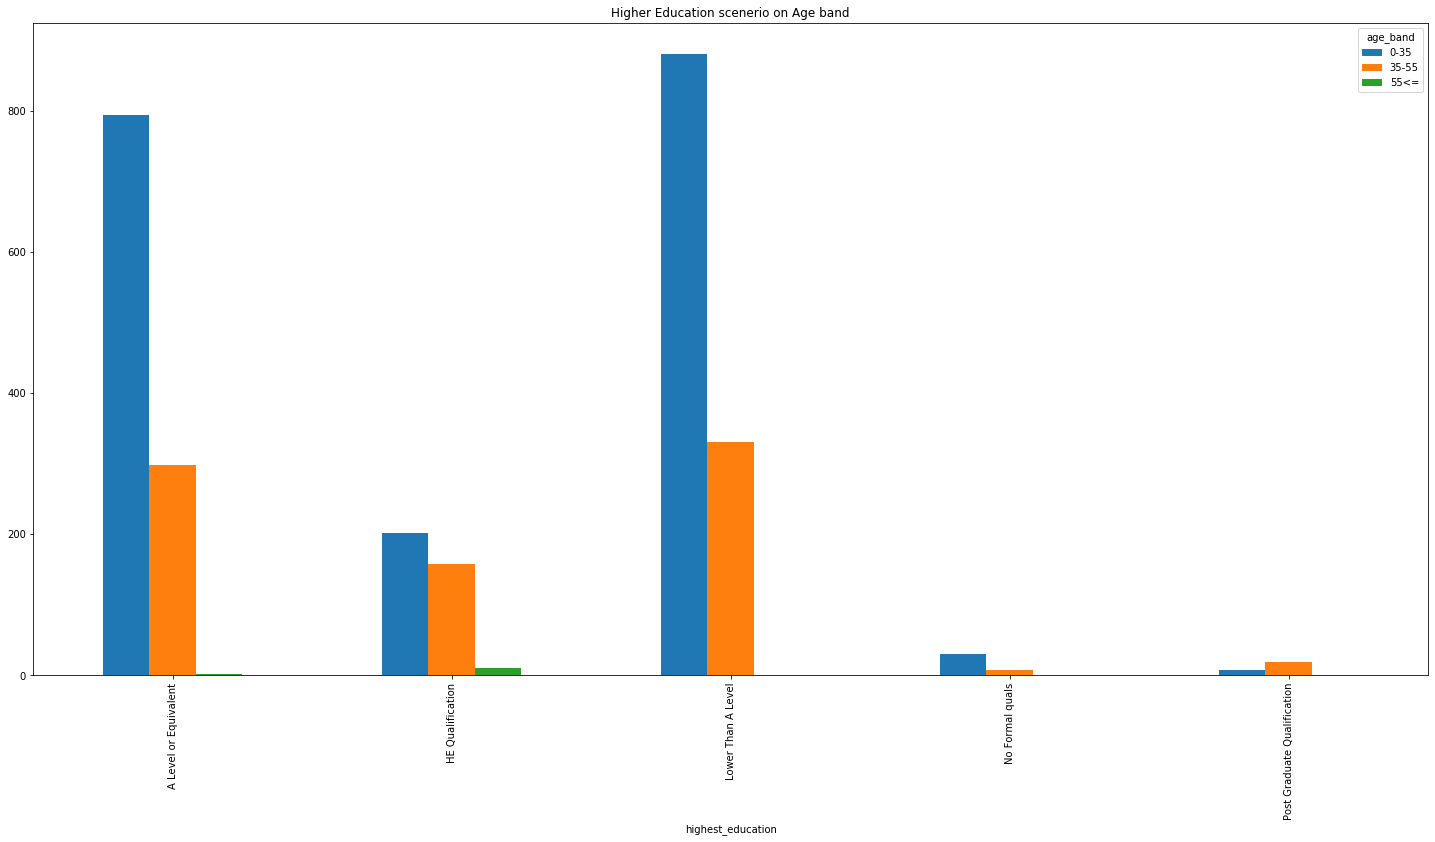

In [33]:
filtered_student_info_previous_attempt_not_0.groupby(['highest_education','age_band']).size().unstack().plot(kind='bar', title='Higher Education scenerio on Age band',figsize=(25,12))
plt.show()

Question: Does education level effected by disability?

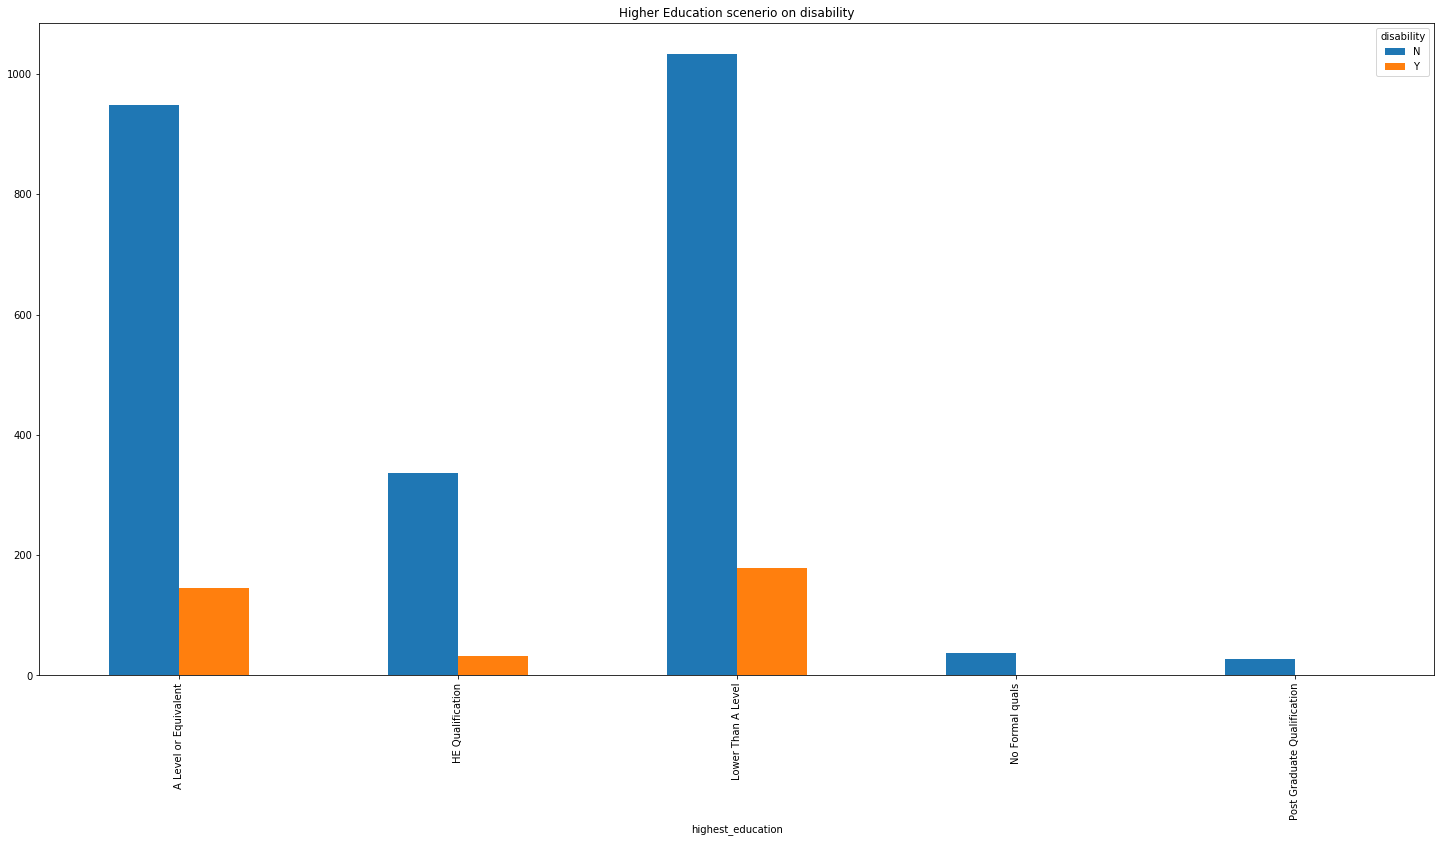

In [34]:
filtered_student_info_previous_attempt_not_0.groupby(['highest_education','disability']).size().unstack().plot(kind='bar', title='Higher Education scenerio on disability',figsize=(25,12))
plt.show()

Question: How are the disability effect those students whose education level is lower than A level?

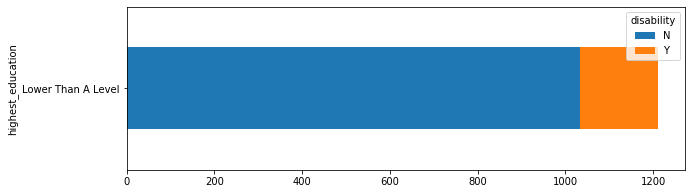

In [35]:
filtered_student_info_previous_attempt_not_0_lower_A_Level = filtered_student_info_previous_attempt_not_0[filtered_student_info_previous_attempt_not_0["highest_education"]== "Lower Than A Level"]
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.highest_education, student_info.disability).plot.barh(stacked = True, figsize=(10,3));

Question: Which course module are more frequently takes on each semester?

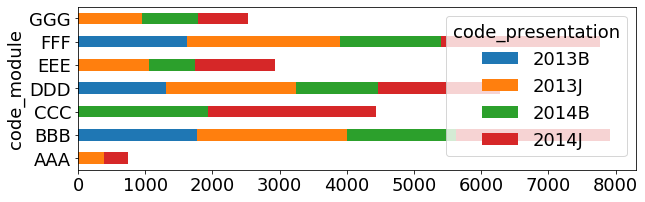

In [163]:
pd.crosstab(student_info.code_module, student_info.code_presentation).plot.barh(stacked = True, figsize=(10,3));

Question: Which course module are more frequently takes on each semester for which education level is lower than A level?

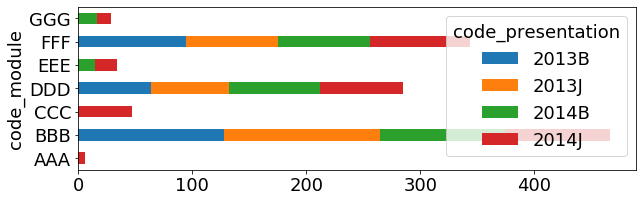

In [164]:
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.code_module, filtered_student_info_previous_attempt_not_0_lower_A_Level.code_presentation).plot.barh(stacked = True, figsize=(10,3));

Merge <b>Student Vle</b> and <b>Vle</b>

In [ ]:
student_vle_merge = student_vle.merge(vle[['id_site', 'activity_type']], on='id_site', how='left')

In [89]:
student_vle_merge.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent


Question: Which activity is most popular among the students?

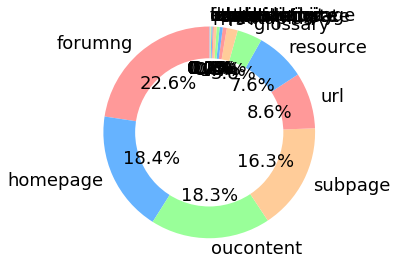

In [88]:
# Pie chart
labels = student_vle_merge['activity_type'].unique()
sizes = student_vle_merge['activity_type'].value_counts()
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Merge <b>student_assessment</b> and <b>assessments</b>

In [ ]:
student_assessment_merge = student_assessment.merge(assessments[['id_assessment', 'assessment_type', 'date', 'weight', 'code_module', 'code_presentation']], on='id_assessment', how='left')

In [93]:
student_assessment_merge.head()

,id_assessment,id_student,date_submitted,is_banked,score,assessment_type,date,weight,code_module,code_presentation
0,1752,11391,18,0,78,TMA,19,10.0,AAA,2013J
1,1752,28400,22,0,70,TMA,19,10.0,AAA,2013J
2,1752,31604,17,0,72,TMA,19,10.0,AAA,2013J
3,1752,32885,26,0,69,TMA,19,10.0,AAA,2013J
4,1752,38053,19,0,79,TMA,19,10.0,AAA,2013J


Question: Which assesment type has majority among the students?

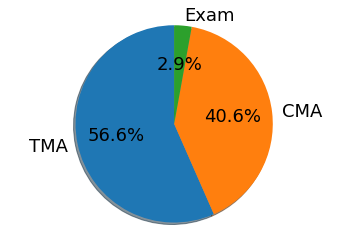

In [99]:
labels = student_assessment_merge["assessment_type"].unique()
sizes = student_assessment_merge["assessment_type"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()